# Importing libraries

In [593]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Sinh các sample $X_i$

In [594]:
n_samples = 100000
u = np.array([0, 0, 0])
Z = np.identity(3)

np.random.seed(0) #Cố định samples
X = np.random.multivariate_normal(u, Z, n_samples)
X

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885],
       ...,
       [ 0.22213958, -0.06599933, -1.03193799],
       [-0.24991257,  0.29219513,  0.65846747],
       [ 0.29477687,  2.11862552,  1.2318284 ]])

# Kiểm định giả thuyết $u_2 = 0$
### $T = x_2 = (0, 1, 0)^T\times X$
### $T$ ~ $N((0, 0, 0)^T\times u, (0, 1, 0)^T\times Z\times (0, 1, 0))$
### $(0, 0, 0)^T\times u = 0$
### $(0, 1, 0)^T\times Z\times (0, 1, 0) = 1$
### => $T$ ~ $N(0, 1)$
### z_score $= (T - 0) / 1 = T$

In [ ]:
T = X[:, 1]
T

array([ 0.40015721,  1.86755799, -0.15135721, ..., -0.06599933,
        0.29219513,  2.11862552])

In [596]:
p_values = (1 - stats.norm.cdf(abs(T))) * 2
p_values

array([0.68904073, 0.06182371, 0.87969394, ..., 0.94737836, 0.77013743,
       0.03412213])

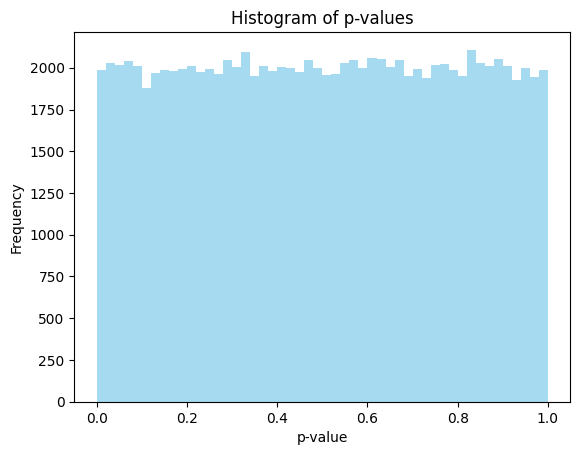

In [597]:
plt.hist(p_values, bins=50, alpha=0.75, color='skyblue')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Histogram of p-values')
plt.show()

In [598]:
ks_stat, ks_p_value = stats.kstest(p_values, "uniform", alternative='two-sided')
print(f"Kolmogorov-Smirnov test statistic: {ks_stat}")
print(f"p-value of the KS test: {ks_p_value}")

Kolmogorov-Smirnov test statistic: 0.0018905830372751287
p-value of the KS test: 0.8664194556475749


# ks_p_value $> 0.05 =>$ p_values uniform $=> u_2 = 0$